In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Set working directory

In [6]:
import os
os.chdir ("E:/UEL SCHOOL MATERIALS/Predictive Analysis and Machine Learning/Assignments")

In [14]:
#Load the online shoppers intention dataset
df = pd.read_csv("E:/UEL SCHOOL MATERIALS/Predictive Analysis and Machine Learning/Assignments/online_shoppers_intention.csv")

In [18]:
#Check for number of rows and columns
df.shape

(12330, 18)

In [20]:
#Display first 10 rows of the dataset
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [22]:
#get the statistics of the dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [26]:
# get the count of missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Let us vizualize the percentage of customers who brought revenue. If a customer made a purchase then it is noted by "True" and "False" if they didn't make a purchase.

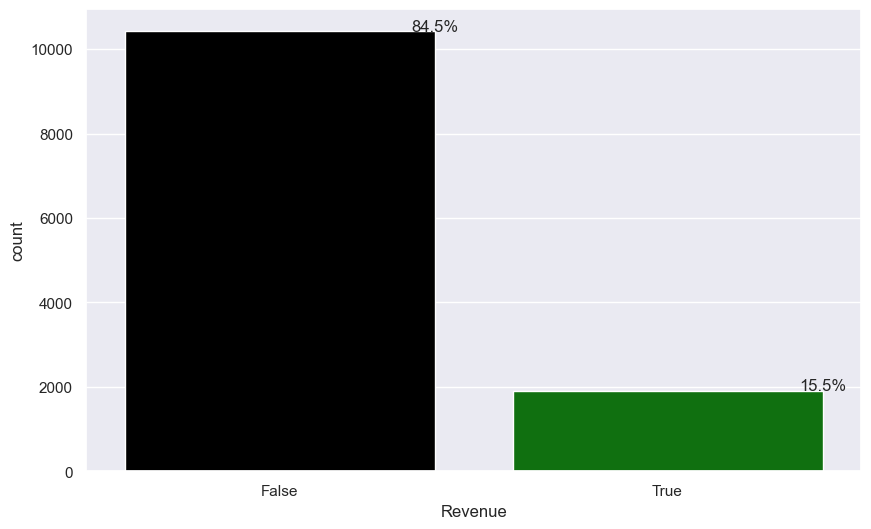

In [49]:
import seaborn as sns

sns.set(style = "darkgrid")
plt.figure(figsize = (10,6))
total = float(len(df)) #calculates the number of entries in df
ax = sns.countplot (x = "Revenue", data=df, palette={"True": "green", "False": "black"})
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total) #calculate the percentage to 1 decimal place
    x = p.get_x() + p.get_width() #getting the x coordinate
    y = p.get_height() #getting height of the bar
    ax.annotate (percentage, (x, y), ha='center')
plt.show()
    

Visualization of Vistor Type

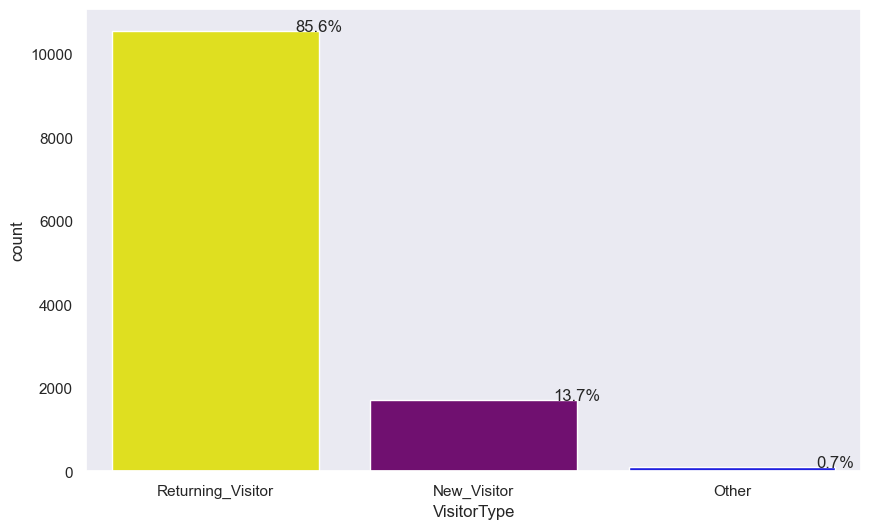

In [62]:
df['VisitorType'].value_counts() # counts the number of appearances of each visitor type
sns.set(style="dark")
plt.figure(figsize=(10,6))
total = float(len(df)) # calculate the number of rows
ax=sns.countplot(x="VisitorType", data=df, palette= {"Returning_Visitor": "yellow", "New_Visitor":"purple", "Other": "blue"
                                                    })
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) #calculate percentage to 1 decimal point
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center')

plt.show()

Let us see the proportion of visitor types over the weekend visits

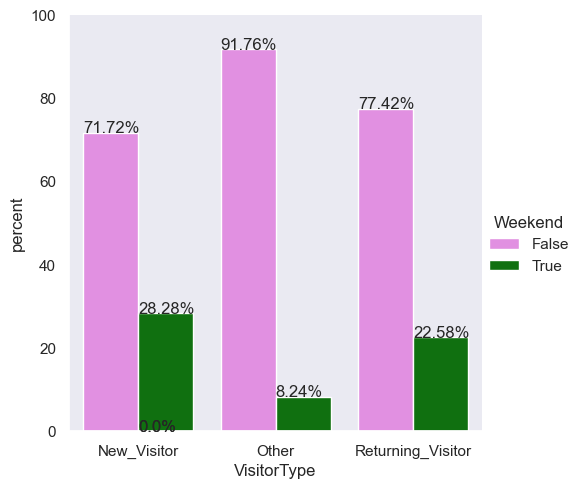

In [91]:
x,y = 'VisitorType', 'Weekend'
df1 = df.groupby(x)[y].value_counts(normalize = True) #group df1 by VisitorType and calculate percentage of each type for the weekend
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent', hue=y,kind='bar', data=df1, palette={True:"green", False: "violet"}) #categorical plot showing percentage of visitor type over the weekend
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(round(float(p.get_height()), 2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)



Relationship between Revenue(buy or not buy) and different Traffic Types

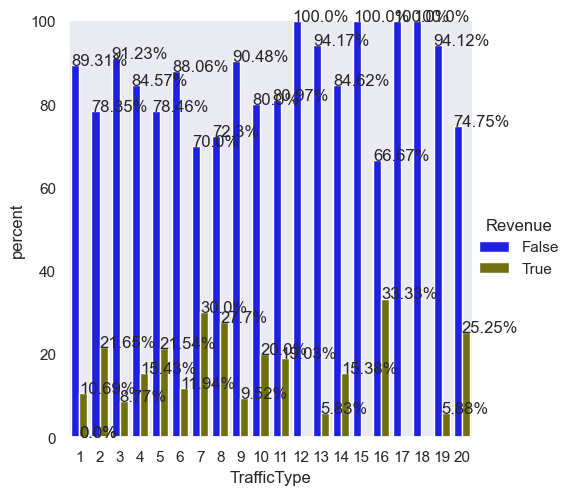

In [95]:
x,y = 'TrafficType', 'Revenue'
df1 = df.groupby(x)[y].value_counts(normalize = True) #group df1 by TrafficType and calculate percentage of each revenue for each Traffic Type
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent', hue=y,kind='bar', data=df1, palette={True:"olive", False: "blue"}) #categorical plot showing percentage oby Traffic Type
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(round(float(p.get_height()), 2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Customer Distribution Across various Traffic Type Codes

Text(0, 0.5, 'Count')

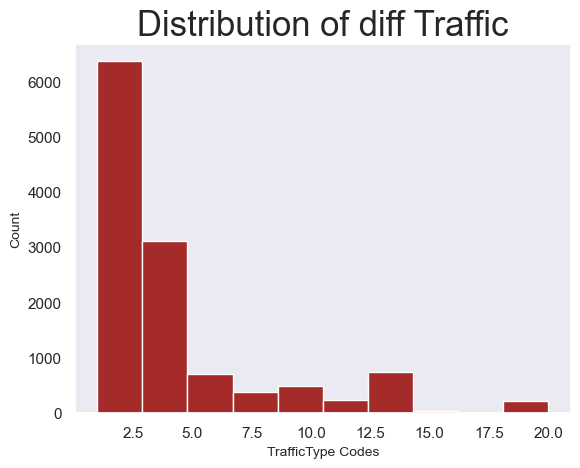

In [83]:
plt.hist(df['TrafficType'], color = 'brown')
plt.title('Distribution of diff Traffic',fontsize = 25)
plt.xlabel('TrafficType Codes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Let us see how customers are distributed based on Region Codes

Text(0, 0.5, 'Count')

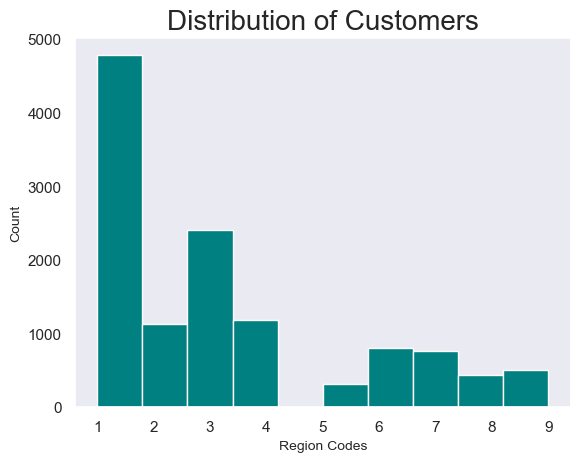

In [86]:
plt.hist(df['Region'], color = "teal")
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Distribution of Customers over OperatingSystems

Text(0, 0.5, 'Count')

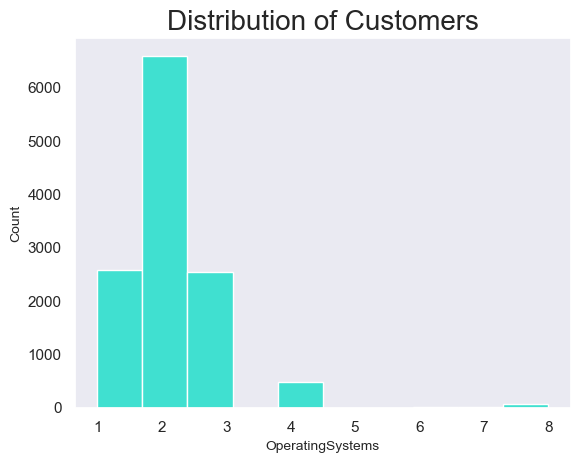

In [89]:
plt.hist(df['OperatingSystems'], color = "turquoise")
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('OperatingSystems', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Customer Distribution by Months

Text(0, 0.5, 'Count')

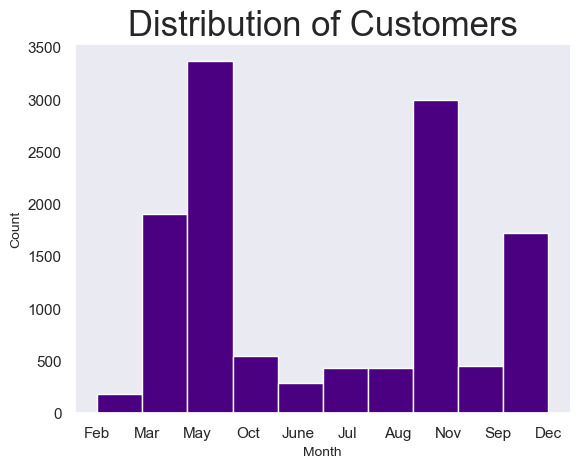

In [102]:
plt.hist(df['Month'], color = "indigo")
plt.title('Distribution of Customers',fontsize = 25)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Analysis of Page Values Across Revenue

<Axes: xlabel='Revenue', ylabel='PageValues'>

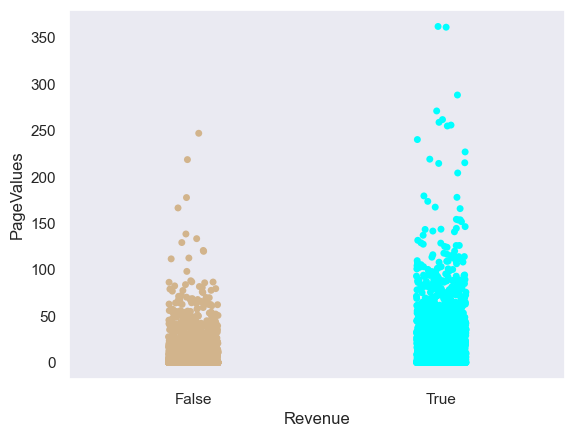

In [111]:
sns.stripplot(x='Revenue', y='PageValues', data=df, palette = {"True": "cyan" , "False": "tan"}) #create a strip plot

Analysis of TrafficType Across Revenue

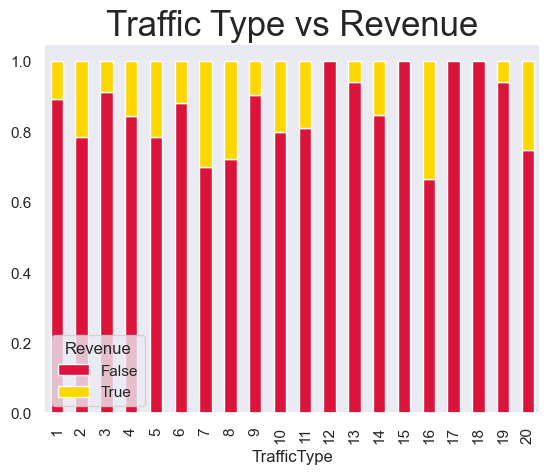

In [122]:
df2 = pd.crosstab(df['TrafficType'], df['Revenue']) #Create a cross-tabulation of 'TrafficType' vs. 'Revenue'
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['crimson', 'gold'])
plt.title('Traffic Type vs Revenue', fontsize = 25)
plt.show()

Distribution of Region over Revenue

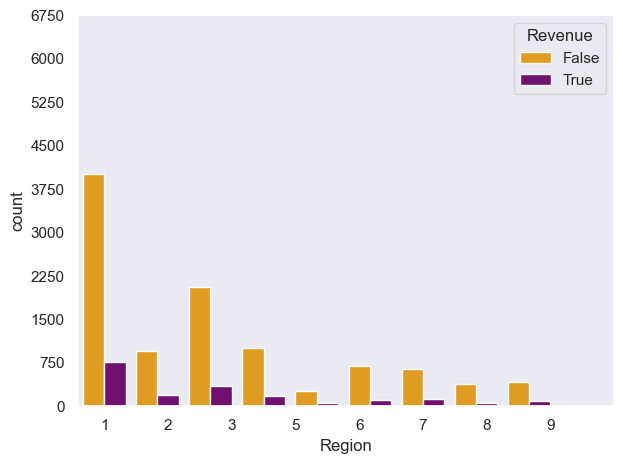

In [145]:
def with_hue(ax, data, x_factor, y_factor):
    x_ticks = np.array(ax.get_xticks())  
    y_ticks = np.array(ax.get_yticks())  
    ax.set_xticks(x_ticks * x_factor)  
    ax.set_yticks(y_ticks * y_factor)  
    ax.legend(title='Revenue')  
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()   


ax4 = sns.countplot(x='Region', hue='Revenue', data=df, palette={True: 'purple', False: 'orange'})  # Count plot 
with_hue(ax4, df['Region'], 1.2, 1.5)


 Linear Regression plot between Administrative and Informational

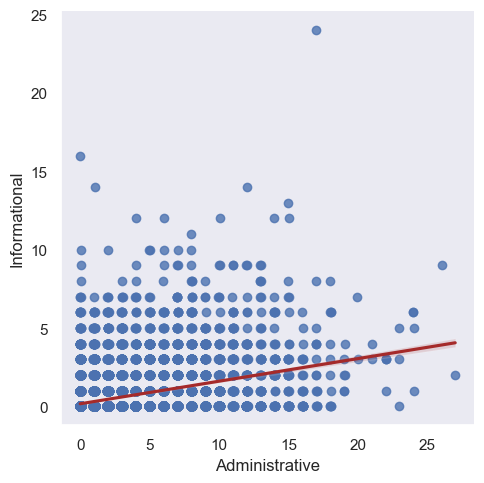

In [152]:
sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05, line_kws={'color' : 'brown'}) #linear model plot showing the relationship between 'Administrative' and 'Informational' variables 

Multivaraite Analysis

We will be plotting Month vs Pagevalues wrt Revenue

Text(0.5, 1.0, 'Mon. vs Pagevalues w.r.t Rev.')

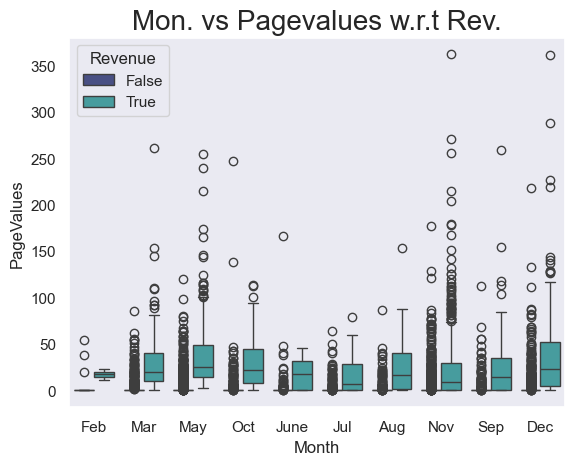

In [173]:
sns.boxplot(x=df['Month'], y=df['PageValues'], hue=df['Revenue'],palette='mako')
plt.title('Mon. vs Pagevalues w.r.t Rev.', fontsize = 20)

month vs bouncerates wrt revenue

Text(0.5, 1.0, 'Mon. vs BounceRates w.r.t. Rev.')

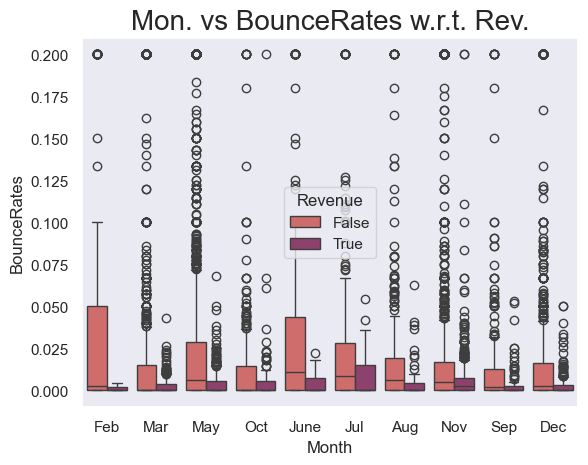

In [176]:
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'flare')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 20)

visitor type vs bounce rates w.r.t revenue

Text(0.5, 1.0, 'Visitors vs BounceRates w.r.t. Rev.')

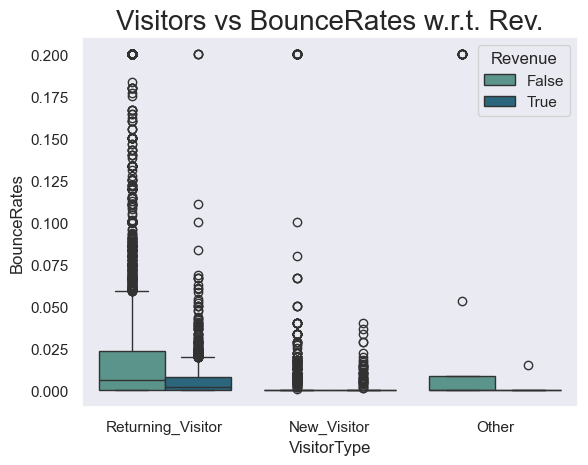

In [179]:
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'crest')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 20)


month vs exit rates wrt revenue

Text(0.5, 1.0, 'Mon. vs ExitRates w.r.t. Rev.')

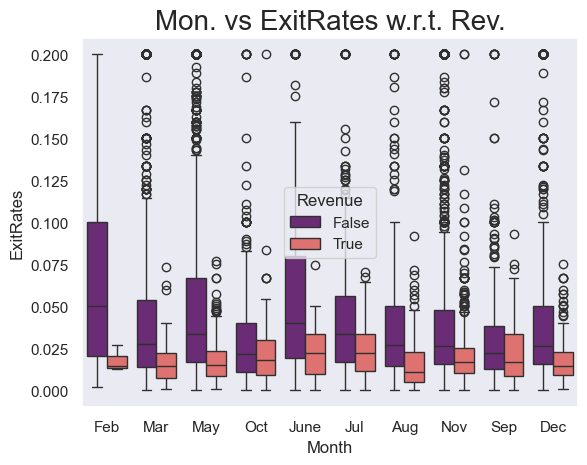

In [183]:
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'magma')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 20)

Data Pre-Processing for Model Building

Customer Segmentation

The goal is to identify effective marketing strategies and we could do this by clustering.

The goal of cluster analysis in marketing is to segment the customers for the personalised marketing. This is popularly done through k-means cluster analysis which is also called scientific segmentation.

We focused on two variables from the overview (administrative duration (column 1) and bounce rate (column 6) to create 11 customer clusters.

A crucial measurement for this analysis is the Within Cluster Sum of Squares (WCSS), which measures the distance of points in a cluster from the cluster centre (centroid). To calculate WCSS we find euclidean distance between each point and centroid assigned to it.

We use the Elbow method to check WCSS vs Number of Clusters for K-means.

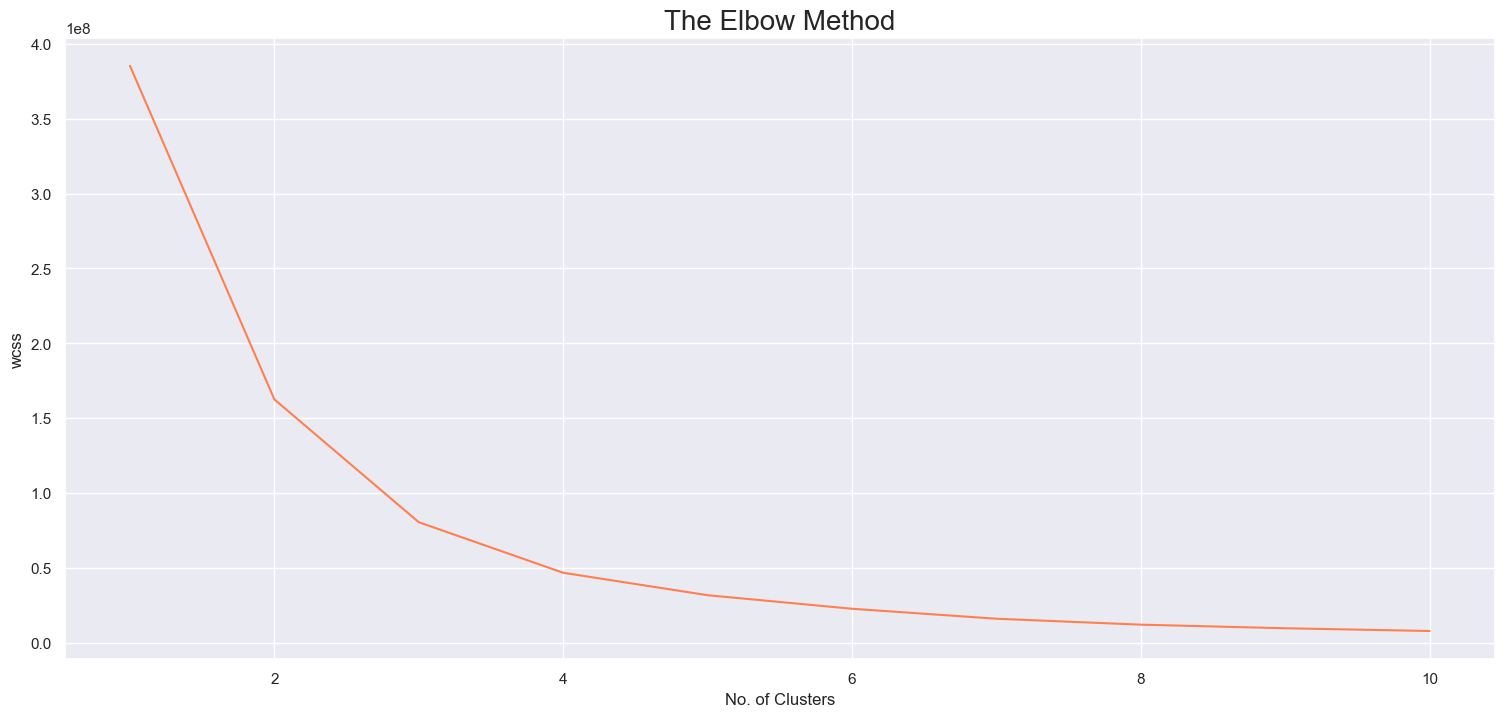

In [201]:
x = df.iloc[:, [1,6]].values #select colums 1 (Administrative Duration) and 6 (Bounce Rates)

x.shape

from sklearn.cluster import KMeans

wcss = []

for i in range (1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)

plt.plot(range(1, 11), wcss, color = 'coral')

plt.grid()

plt.tight_layout()

plt.title('The Elbow Method', fontsize = 20)

plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

plt.show()


To analyze our data more effectively, we've decided to create two groups. This approach helps us categorize customers based on their behavior, enabling us to identify various user types and customize our marketing strategies accordingly.

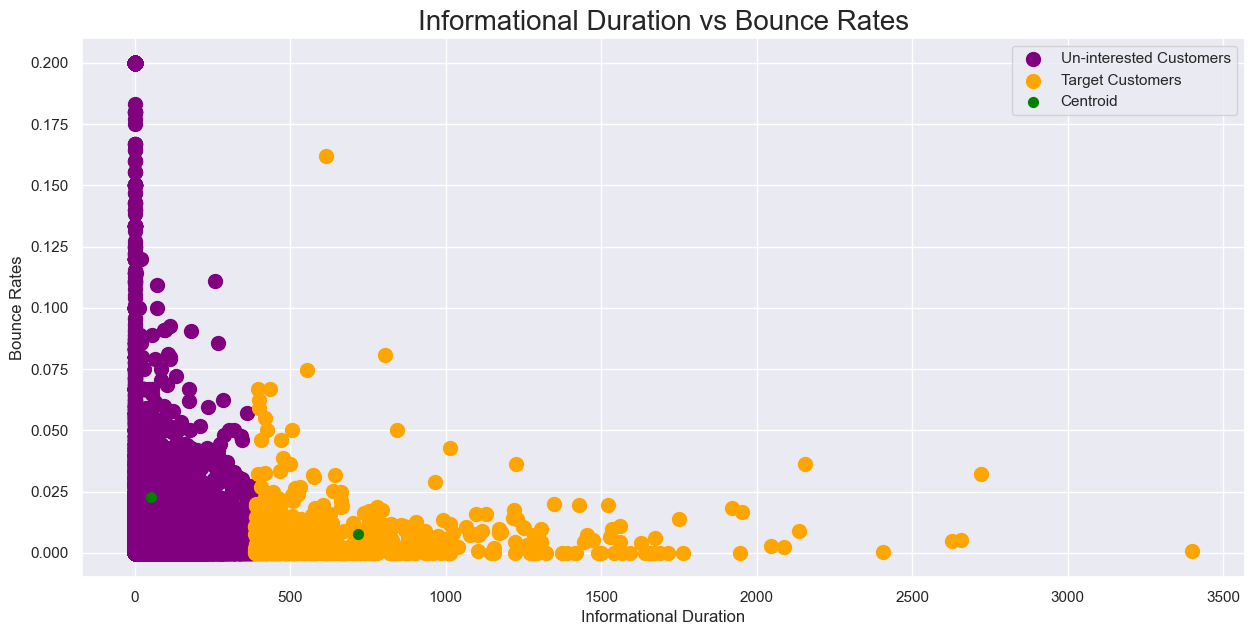

In [204]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='purple', label='Un-interested Customers')  
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='orange', label='Target Customers')  
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='green', label='Centroid')  

plt.title('Informational Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()


Let us look at where the customer comes from that is Region vs Traffic Type

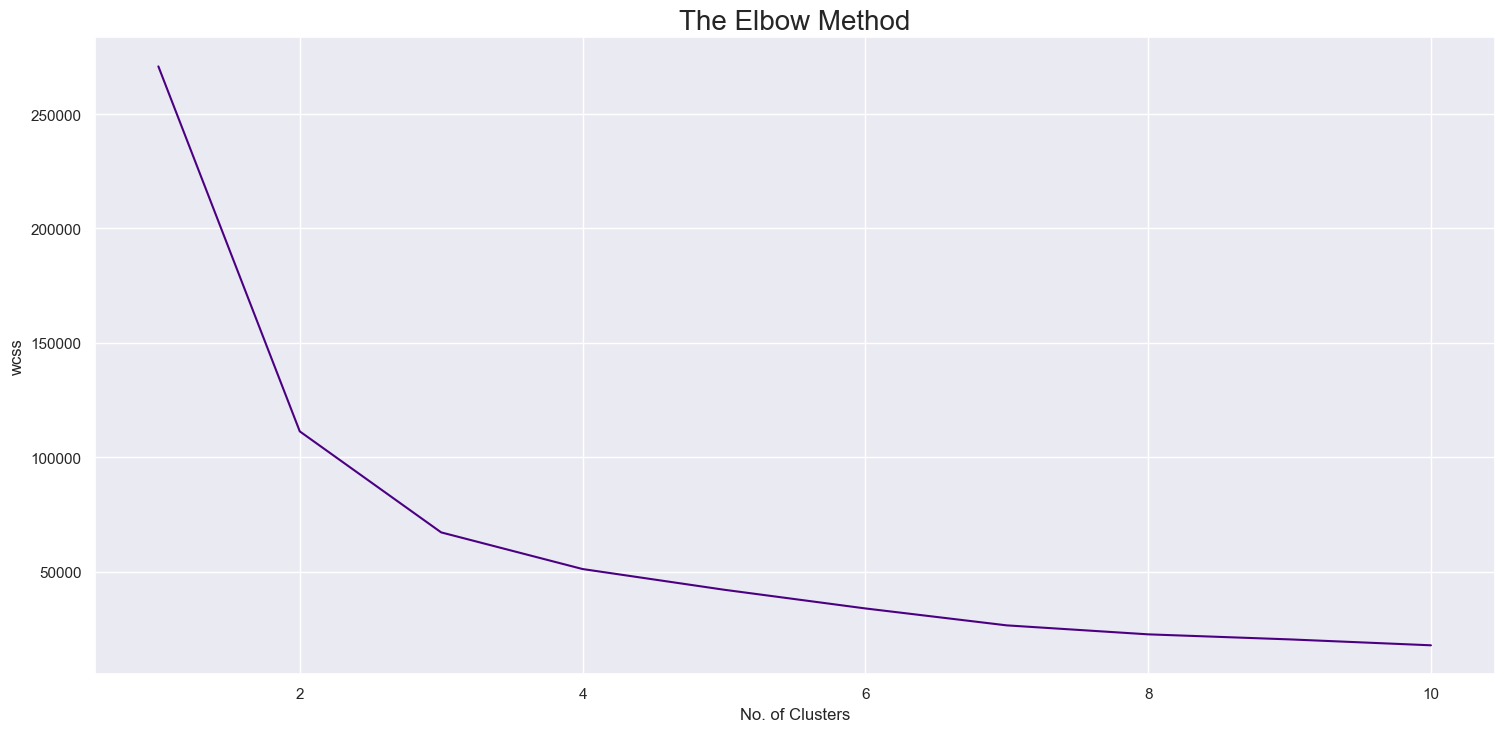

In [208]:
x = df.iloc[:, [13,14]].values
wcss = []

for i in range (1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15,7)
plt.plot(range(1, 11), wcss, color = 'indigo')

plt.grid()
plt.tight_layout()

plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

plt.show()

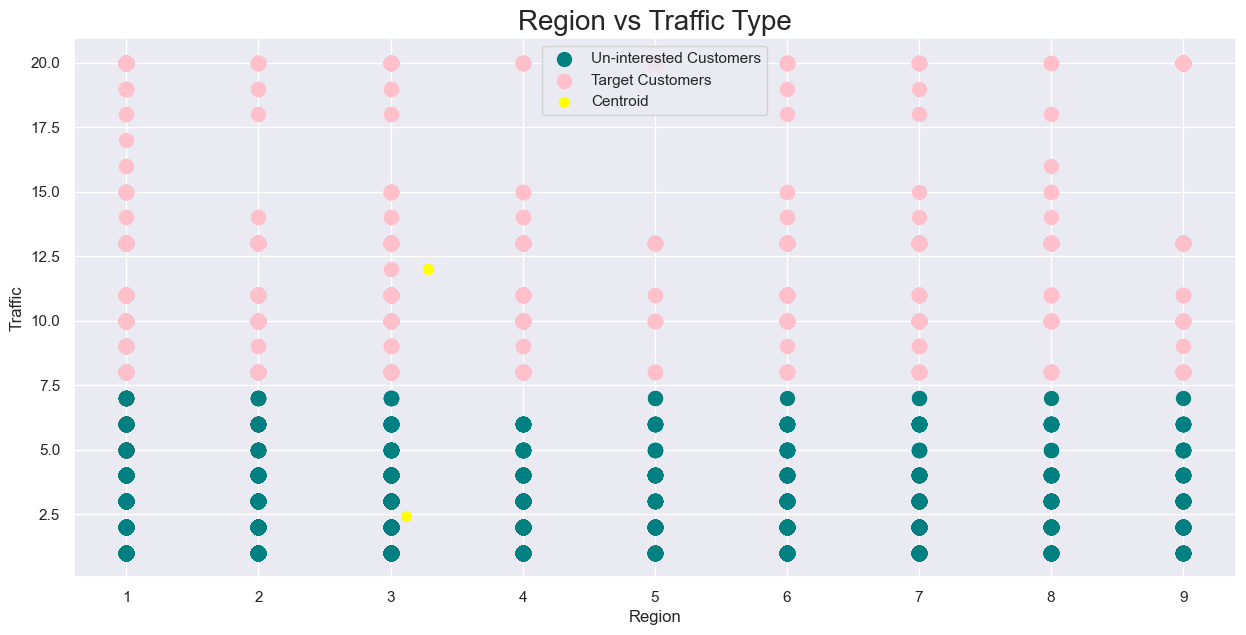

In [210]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='teal', label='Un-interested Customers')  
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='pink', label='Target Customers')  
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='yellow', label='Centroid')  

plt.title('Region vs Traffic Type', fontsize=20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()


# **Data Preprocessing for Predictive Modelling**

Building a Random Forest Classifier and Logistic Regression

In this stage, we prepare the dataset in order to train machine learning models that will predict the way in which customers will behave when making purchases. Thus, with the help of a binary classifier, we aim to categorize the customers into two groups, the ones who will purchase and the ones who will not. It is important to note that this step in the preprocessing of data is very crucial in improving the performance of the model and making sure the predictions are correct, which in turn helps in the effective implementation of marketing strategies.

In [217]:
# let's convert categorical variables into dummy variables

data1 = pd.get_dummies(df) #create the dummy variables for all categorical columns
data1.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue']) #transform the Revenue column to numerical values
df['Revenue'].value_counts()

# getting dependent and independent variables
x=data1
# removing the target column revenue from 
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue'] #set dependent variable as the 'Revenue' column
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


Now we can split the data into train and test sets 

In [222]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) # the testing sets is 30% of the data
# checking the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


# **Modeling**

This section of the project is aimed at the  application of predictive models to understand, which customers are most likely to make a purchase depending on the availability of features in the given dataset. By using the Random Forest Classifier, which is recognized for its robustness and reliability in dealing with intricate data, and also a Logistic Regression model for binary classification, we will obtain those models. These models will give us insight into the customer's behavior and thus, help us create marketing tactics that are  to their needs.


RandomForest Classifier Model

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8929440389294404


An accuracy of 100% was achieved by the model for the training data. This shows that the model has accurately classified all the training examples. It might seem impressive; however, it may also overfit the data, which means the model has learned the training data too well, including its noise and outliers. It can result in less accurate generalization to unseen data.


Training data accuracy is about 89.3%. It is a strong performance and indicates that the model can generalize to some or all of the new unseen data. Nonetheless, as the training accuracy is more than the test accuracy, it can be inferred that the overfitting problem arises. The ideal situation is where the difference between the two types of accuracies is as small as possible.

# **Confusion Matrix**

To this end, we are going to use the confusion matrix for a better understanding of the performance of the Random Forest classifier. Even though the model archived a training accuracy of 100%, the testing accuracy, on the other hand, was found to be around 89%. It is possible that the model simply overfitted to the training data which means it found patterns that did not generalize well to new and unseen data. The confusion matrix will provide a full breakdown of the model's predictions, hence we will be able to investigate true positives, true negatives, false positives, and false negatives. By following these metrics, we can hence grasp the way the model discriminates the classes and can point out the spots where there can be potential improvements.

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3077
           1       0.75      0.55      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699



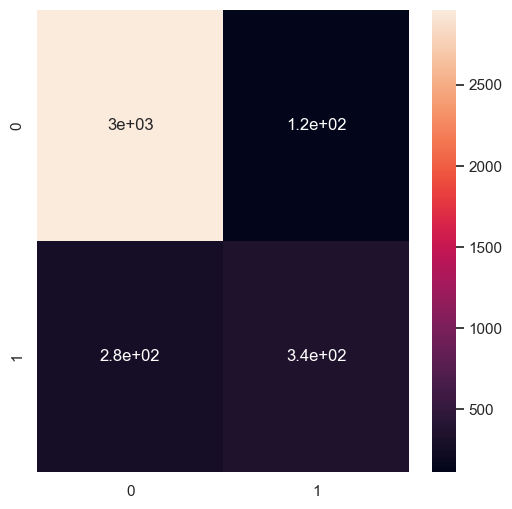

In [276]:
cm = confusion_matrix(y_test, y_pred) #calculates the confusion matrix comparing actual and predicted values
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

The confusion matrix and classification report depict our model as a strong predictor for this target, with such a high accuracy as 89%. Nevertheless, the model is less accurate in predicting customers who will buy. Concretely, correct 96% of the time the model will say "no" to the customers who are non-buyers, but, alarmingly, it correctly says "yes" only in 55% of the cases where it is real. It implies that the model does a better job of identifying customers who are not likely to buy, but we could improve its ability to recognize potential buyers that would allow us to have a more balanced marketing strategy.

As we went through the first confusion matrix, we could see how the model behaved on the test data. To drill down deeper into the performance of the model from the whole, we will create a second confusion matrix. This will be the one that will give us a summary of how the model correctly classified all the data points in the dataset i.e. the training and testing parts, which in turn will help us further evaluate its predictive ability and the average pattern, if any.

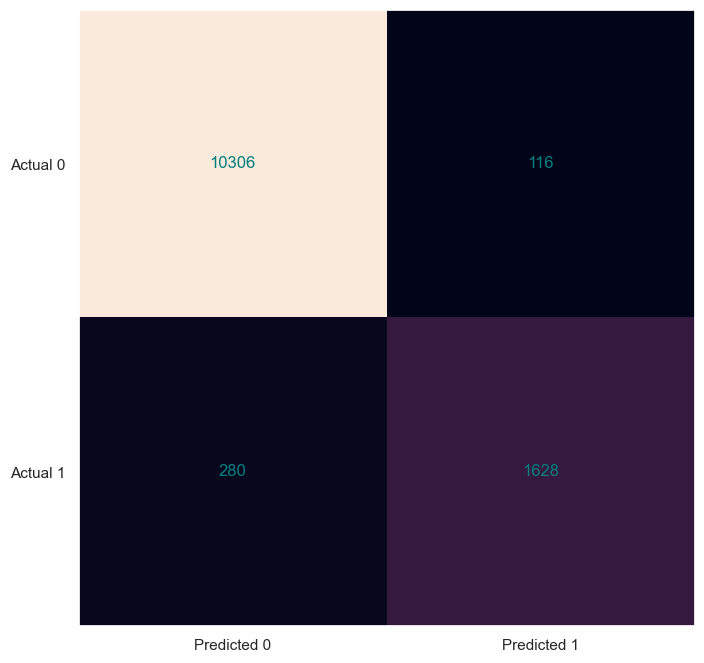

In [286]:
cm = confusion_matrix(y, model.predict(x)) #compute the confusion matrix with the whole dataset
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)

classes = np.unique(y)

ax.grid(False)
ax.xaxis.set(ticks=range(len(classes)), ticklabels=[f'Predicted {cls}' for cls in classes])
ax.yaxis.set(ticks=range(len(classes)), ticklabels=[f'Actual {cls}' for cls in classes])

ax.set_ylim(1.5, -0.5)

for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='teal')

plt.show()

The model is mainly devoted to the prediction of customer behavior, specifically regarding whether a consumer will buy it or not. The matrix consists of four main zones: those who actually did not buy and were correctly identified as non-buyers (True Negatives), those that were incorrectly labeled as buyers by the model (False Positives), those who were buyers in actuality, but were predicted as non-buyers (False Negatives), and those customers who were correctly predicted as buyers. The more number of True Negatives, the better the non-buyer identification capacity of the model, while the True Positives are what indicate how well it does with the actual buyer predictions. Failure to identify the results with False Positives and False Negatives allows us to improve the model by directing the right customers with efficiency.

# **Plotting the ROC curve for Random Forest**

The ROC curve is going to be very significant to us in terms of the measurements with the Random Forest model we secure and how effectively it can predict the buyers and non-buyers among our customers. It plots the True Positive Rate on the y-axis and the False Positive Rate on the x-axis, illustrating the accuracy of the predictions. The area under the ROC curve (AUC) is a single measure that captures overall model performance, with higher values indicating the better model and 0.5 corresponds to pure chance. A curve that is near the upper left corner usually signifies superior performance. Apart from that, the AUC takes the form of a continuous single measure of how accurate the model is; A value of 1 is the highest and it refers to the perfect identification of the states, an AUC of 1 means that the model is able to discriminate between the classes perfectly, while an AUC of 0.5 is the worst outcome and it implies no difference from the random classifier.

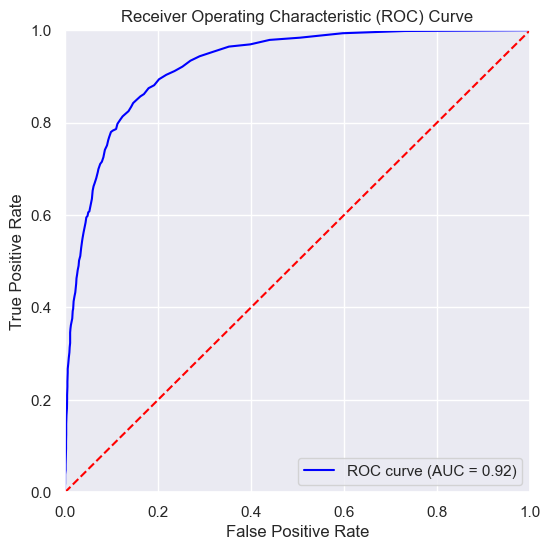

In [301]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_probs = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The AUC (Area under the Curve) score at **0.92** from the Random forest has a high performance in differentiating the buyers and non-buyers. The said value as being very high tells us that the model is very accurate in recognizing the true buyers and avoiding the mistake of misclassifying non-buyers. Most often, an AUC score near 1.0 is taken to be a strong ability in the model to classify while an AUC of around 0.5 implies the observation is nothing more than pure luck. Based on the area under the curve (AUC) of 0.92, we can take advantage of the model for proper marketing planning and other business decisions, although we should also be wary of various trade-offs specific to our sensitivity and specificity.


The forecasts created by the Random Forest model can be saved into a dataframe, which we can then export in a .csv file to see which customer will bring us the most revenue.


In [308]:
df2 = pd.DataFrame(y_pred, columns=["Revenue"])
df2

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
3694,0
3695,1
3696,0
3697,0


# **Building Logistic Regression Model**

Logistic Regression is regularly chosen as a reference model because of its inherent simplicity and interpretability. By matching its performance with the Random Forest model, we may gain deeper insight into the development of more complex models. Furthermore, Logistic Regression can unveil which aspects are of prime importance in the purchase decision, in turn, increasing the transparency of these issues vis-a-vis the Random Forest model. This comparison is beneficial in the stable model, identifying the best approach for targeted marketing and in the final analysisimproving decision-making.



In [315]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

# **Printing the Confusion Matrix**

We can use the confusion matrix to find out which Logistic Regression model classified our test data most well. It is a mathematical method by which we can evaluate the model’s reliability. The specific confirmation of the reliability of the output is done as follows. It prints a summary of the model’s correct and incorrect predictions with the help of counts of all four types such as true positives, true negatives, false positives, and false negatives. This is very important since it makes us more familiar with the model’s accuracy and allows us to spot possible distortions as well as decide if it has a better understanding of one outcome than another.


In [319]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2961  116]
 [ 280  342]]


The confusion matrix reveals information about the predictability of customer purchases by our Logistic Regression model. Out of all real buyers who were registered as non buyers, 2961 were well matched with actual results, while 116 were erroneously tagged as such. The correct identification of buyers was made by the model for 342 customers, whereas in the case of 280 buyers, the model mistakenly identified them as non-buyers. The distribution of right and wrong predictions allows us to measure the model’s performance by the criteria of precision and recall mainly. With these metrics in mind, we can cut through the complexities and better grasp how our model correctly differentiates buyers from non-buyers, which is indubitably quintessential in creating reliable business decisions.

We can also plot the confusion matrix as below: 


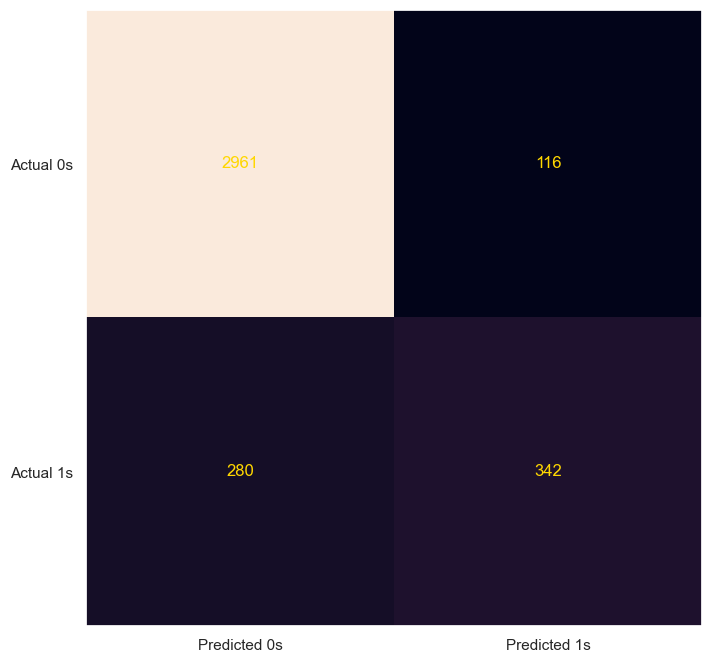

In [326]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='gold')


plt.show()

We can now summarize the performance of the Logistic Regression Model through a Classification Accuracy Report as follows:


In [329]:
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3077
           1       0.76      0.38      0.50       622

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.86      0.88      0.86      3699



The classification report shows high performance on the non-buying class (class 0), with an effectiveness of 89% precision and a recall of 98%; it hardly misclassifies them. On the other hand, hardly any product buyers (class 1) are identified, with a low-tempered precision count of 76% and a poor recall value of 38%, indicating that the model is missing quite a number of actual buyers. The model achieves an overall accuracy of 88%, which is reasonably satisfactory, but the lower score for buyers indicates the need for specific strategies for this group. 

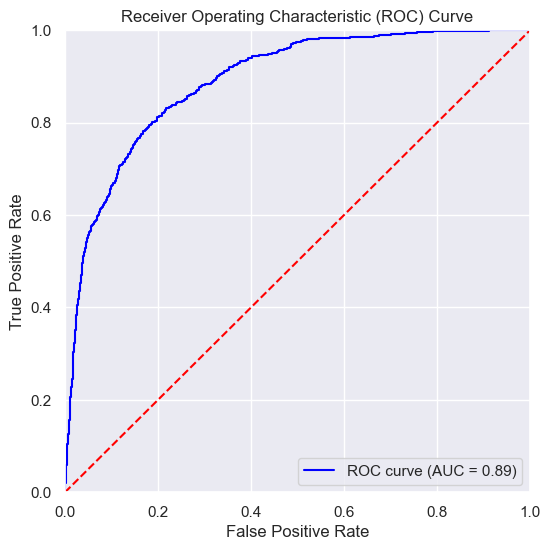

In [334]:
#Plotting ROC Curve for Logistic Regression

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_probs = model1.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [336]:
#save the predictions into a data frame : 

df3 = pd.DataFrame(y_pred1, columns=["Revenue"])
df3

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
3694,0
3695,1
3696,0
3697,0


Plot ROC curve for both Random Forest and Logistic Regression 

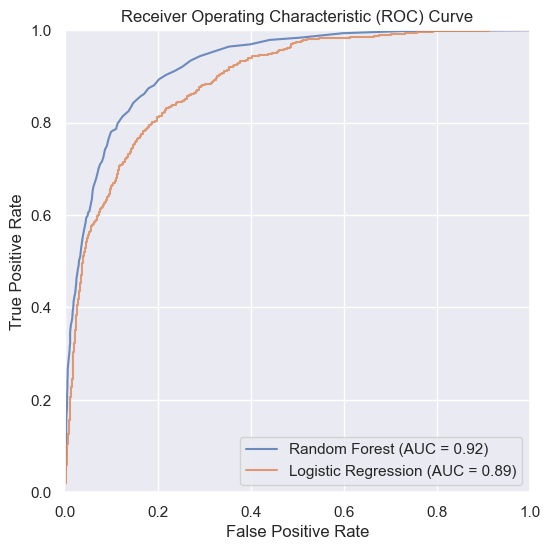

In [349]:
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
ax = plt.gca()

# For Random Forest model
y_probs_rf = model.predict_proba(x_test)[:, 1] 

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', alpha=0.8)

# For Logistic Regression model
y_probs_lr = model1.predict_proba(x_test)[:, 1]  
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', alpha=0.8)

#labelling the plot
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.grid()

# Show the plot
plt.show()